In [224]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import math

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

models = list(listdir_nohidden("src/Models/"))

dfs = []
for model in models:
    path = "src/Models/" + model
    try:
        df = pd.read_json(path +  "/scores.json")
        # df.index = df["Iteration"]
        df = df.drop(columns=["Recording"])
        config = pd.read_json( "src/Models/" + model + "/config.json", lines=True)
        df["algo"] = config["algo"].item()
        df["env"] = config["env"].item()
        dfs.append(df)
    except:
        pass
    
games = [df["env"][0] for df in dfs]
games = list(set(games))

print(f"n dfs: {len(dfs)}\ngames: {games}")

n dfs: 17,
 games: ['GravitarNoFrameskip-v4', 'VentureNoFrameskip-v4', 'MontezumaRevengeNoFrameskip-v4', 'SolarisNoFrameskip-v4']


(2, 2)


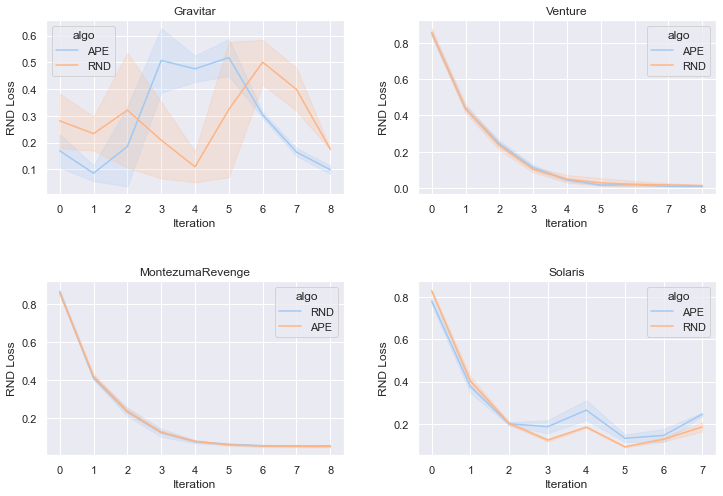

In [227]:
n_games = len(games)

sns.set_theme(style="darkgrid", palette="pastel")
shape_subplot = max(1, math.ceil(n_games / 2)), max(2, math.floor(n_games/ 2))
print(shape_subplot)
fig, axes = plt.subplots(*shape_subplot, figsize=(12,8))
fig.subplots_adjust(hspace=0.5, wspace=0.25)


for i in range(0, shape_subplot[0]):
    for j in range(0, shape_subplot[1]):
        game = games[i*shape_subplot[1]+j]
        dfs_game = [df for df in dfs if df["env"][0] == game]

        if len(dfs_game) != 0:
            df = pd.concat(dfs_game, ignore_index=True)
            sns.lineplot(ax=axes[i,j], data=df, x="Iteration", y="RND Loss", ci=95, estimator='mean', hue="algo")

        title = game.replace("NoFrameskip-v4", "")
        axes[i,j].set_title(title)

